# Threading, Multiprocessing, and Workers
> Deep RL course - Fall 2024 - Sharif University of Technology - Workshop session <br>
> Author: M Narimani - December 15th, 2024

- Concurrent programming (e.g., `threading`)
- Parallel programming (e.g., `multiprocessing`)

<center>
<img src="https://i.postimg.cc/pLxVWgkK/maxresdefault.jpg" alt="https://www.youtube.com/watch?v=RlM9AfWf1WU" width=450/>
</center>

In [1]:
import time
import threading
import multiprocessing
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor
import math

### A simple function to calculate the sum of sqrts

In [2]:
def calculate_sum_of_sqrts(start, end):
    result = sum(math.sqrt(x) for x in range(start, end))
    print(f"Sum of sqrts from {start} to {end}: {result}")
    return result

This script uses workers—threads or processes—to divide the computational task into smaller subtasks that can be executed in parallel.

- __Threading__: Creates multiple threads (lightweight workers) to run the `calculate_sum_of_sqrts` function concurrently. Threads share memory space but run independently, leveraging parallelism within a single process.
- __Multiprocessing__: Spawns multiple processes (independent workers) to run the same function. Each process has its own memory space, which can reduce contention but introduces inter-process communication overhead.
- __ThreadPoolExecutor__: Manages a pool of threads, automatically assigning tasks to available threads.
- __ProcessPoolExecutor__: Manages a pool of processes, distributing tasks among them.

## Using sequential processing

In [3]:
def sequential_example():
    start_time = time.time()
    for i in range(4):
        start, end = i * 25000, (i + 1) * 250000
        calculate_sum_of_sqrts(start, end)
    end_time = time.time()
    print(f"Sequential processing took: {end_time - start_time:.4f} seconds")

In [4]:
sequential_example()

Sum of sqrts from 0 to 250000: 83333083.12553044
Sum of sqrts from 25000 to 500000: 233066754.51538852
Sum of sqrts from 50000 to 750000: 425558820.75777876
Sum of sqrts from 75000 to 1000000: 652973239.6595664
Sequential processing took: 0.6421 seconds


## Using threading

In [5]:
def threading_example():
    threads = []
    start_time = time.time()
    for i in range(4):
        start, end = i * 25000, (i + 1) * 250000
        thread = threading.Thread(target=calculate_sum_of_sqrts, args=(start, end))
        threads.append(thread)
        thread.start()
    
    for thread in threads:
        thread.join()

    end_time = time.time()
    print(f"Threading took: {end_time - start_time:.4f} seconds")

In [6]:
threading_example()

Sum of sqrts from 0 to 250000: 83333083.12553044
Sum of sqrts from 25000 to 500000: 233066754.51538852
Sum of sqrts from 50000 to 750000: 425558820.75777876
Sum of sqrts from 75000 to 1000000: 652973239.6595664
Threading took: 0.6394 seconds


## Using multiprocessing

In [7]:
def multiprocessing_example():
    processes = []
    start_time = time.time()
    for i in range(4):
        start, end = i * 25000, (i + 1) * 250000
        process = multiprocessing.Process(target=calculate_sum_of_sqrts, args=(start, end))
        processes.append(process)
        process.start()
    
    for process in processes:
        process.join()

    end_time = time.time()
    print(f"Multiprocessing took: {end_time - start_time:.4f} seconds")

In [8]:
multiprocessing_example()

Multiprocessing took: 0.2421 seconds


## Using ThreadPoolExecutor

In [9]:
def thread_pool_example():
    start_time = time.time()
    with ThreadPoolExecutor(max_workers=50) as executor:
        for i in range(4):
            start, end = i * 25000, (i + 1) * 250000
            executor.submit(calculate_sum_of_sqrts, start, end)

    end_time = time.time()
    print(f"ThreadPoolExecutor took: {end_time - start_time:.4f} seconds")

In [10]:
thread_pool_example()

Sum of sqrts from 0 to 250000: 83333083.12553044
Sum of sqrts from 25000 to 500000: 233066754.51538852
Sum of sqrts from 50000 to 750000: 425558820.75777876
Sum of sqrts from 75000 to 1000000: 652973239.6595664
ThreadPoolExecutor took: 0.6395 seconds


## Using ProcessPoolExecutor

In [11]:
def process_pool_example():
    start_time = time.time()
    with ProcessPoolExecutor(max_workers=50) as executor:
        for i in range(4):
            start, end = i * 25000, (i + 1) * 250000
            executor.submit(calculate_sum_of_sqrts, start, end)

    end_time = time.time()
    print(f"ProcessPoolExecutor took: {end_time - start_time:.4f} seconds")

In [12]:
process_pool_example()

ProcessPoolExecutor took: 0.2531 seconds


## Plot comparison

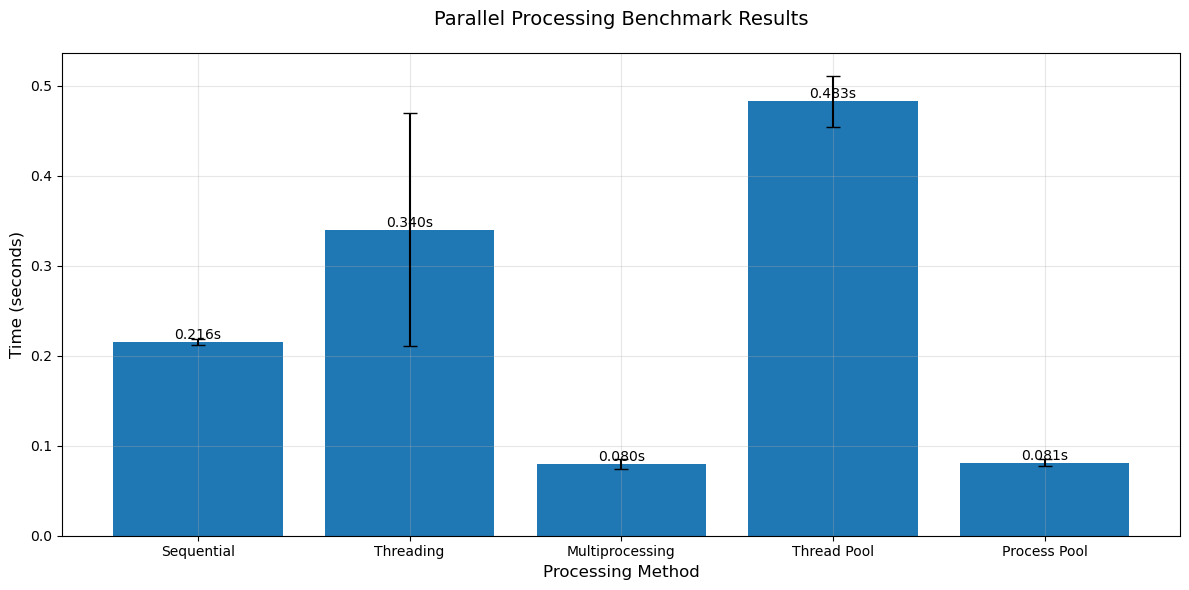

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def run_benchmark(func, num_runs=10):
    assert callable(func), f"👻 {func} must be a callable function."
    times = []
    for _ in range(num_runs):
        start_time = time.time()
        func()
        end_time = time.time()
        times.append(end_time - start_time)
    
    return np.mean(times), np.std(times), times

def benchmark_all():
    functions = {
        'Sequential': sequential_example,
        'Threading': threading_example,
        'Multiprocessing': multiprocessing_example,
        'ThreadPoolExecutor': thread_pool_example,
        'ProcessPoolExecutor': process_pool_example
    }
    
    # Run benchmarks
    results = {}
    for name, func in functions.items():
        #print(f"\nRunning benchmark for {name}...")
        mean_time, std_dev, times = run_benchmark(func)
        results[name] = {
            'mean': mean_time,
            'std': std_dev,
            'times': times
        }
        #print(f"Mean time: {mean_time:.3f}s ± {std_dev:.3f}s")
        #print(f"Individual times: {', '.join([f'{t:.3f}' for t in times])}s")
    
    # Prepare data for plotting
    names = list(results.keys())
    means = [results[name]['mean'] for name in names]
    stds = [results[name]['std'] for name in names]
    
    plt.figure(figsize=(12, 6))
    bars = plt.bar(names, means, yerr=stds, capsize=5)
    
    plt.title('Parallel Processing Benchmark Results', fontsize=14, pad=20)
    plt.xlabel('Processing Method', fontsize=12)
    plt.ylabel('Time (seconds)', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}s',
                ha='center', va='bottom')
    
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

benchmark_all()

> **TODO:**
> - Show that for operations that complete very quickly, parallelisation does not bring much benifit (the overhead of process synchronisation takes long)
> - Try manipulating `calculate_sum_of_sqrts`, or start and end values in each process.
> - Try changing the number of subprocesses. Use `multiprocessing.cpu_count()` as max_workers.

## A3C implementation: Why not `multiprocessing` instead of `threading`?

Key differences:

1. `threading` uses shared memory, while `multiprocessing` creates separate memory spaces
2. A3C's shared model parameters and optimizer states need explicit sharing mechanisms with `multiprocessing` (using `Manager()` or `shared_memory`)
3. Network communication between processes requires serialization/deserialization
4. Global variables won't be shared automatically